# EDA

- Exploratory Data Analysis, 탐색적 데이터 분석 (탐색적 요인 분석)

### EDA 절차

1. 데이터 로드
    - 다양한 소스에서 데이터를 로드한다. (파일, 데이터베이스, API 등에서 데이터를 불러온다.)
    - 데이터가 로드된 후에는 구조를 확인하기 위해 첫 몇 줄의 데이터를 출력해 본다.

2. 데이터 구조 및 기초 통계 확인
    - 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
    - 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
    - df.head(), df.info(), df.describe() 등의 함수를 사용한다.

3. 결측치 및 이상치 탐색
    - 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
    - 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
    - df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.

4. 데이터 시각화를 통한 탐색
    - 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
    - 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
    - sns.countplot(), sns.heatmap() 등의 함수를 사용한다.

5. 데이터 정제 및 전처리
    - 필요 없는 변수나 중복 데이터를 제거한다.
    - 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다.
    - df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 활용한다.

6. 데이터 변환 및 피처 엔지니어링
    - 새로운 피처를 생성하거나 기존 피처를 변환하여 분석에 적합한 형태로 데이터를 조정한다.
    - 로그 변환, 다항식 피처 추가 등 다양한 기법을 통해 데이터를 변환할 수 있다.
    - np.log(), PolynomialFeatures() 등의 함수를 활용한다.
    
7. 데이터 분할
    - 학습용과 테스트용 데이터로 분할한다.
    - 이 과정은 모델을 평가하고 성능을 검증하는 데 중요한 단계이다.
    - train_test_split() 함수를 사용한다.

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터로드

In [405]:
df = pd.read_csv('./data/titanic.csv')

In [406]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [408]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. 결측치 및 이상치 탐색

In [409]:
# 결측치 탐색
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


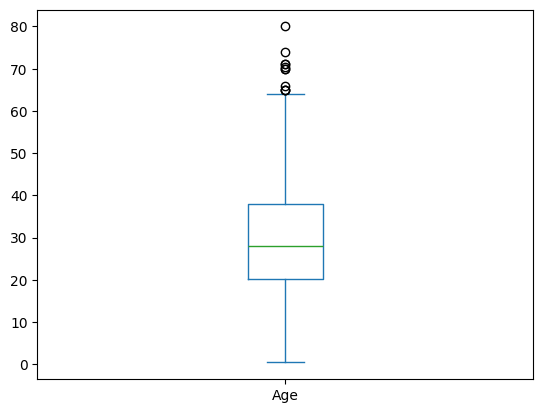

In [410]:
# 이상치 탐색

df['Age'].plot(kind='box')
df[df['Age']<=1]

### 4. 데이터 시각화를 통한 탐색

<Axes: >

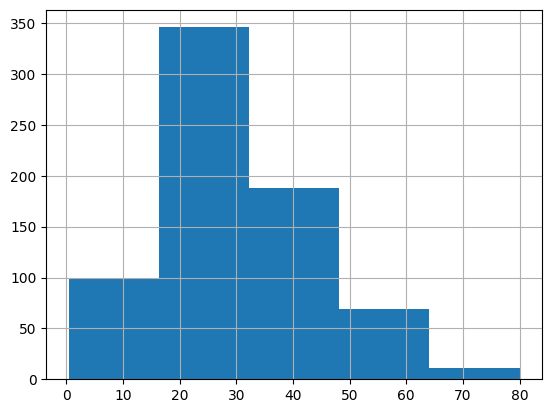

In [411]:
df['Age'].hist(bins=5)

<Axes: xlabel='Survived', ylabel='count'>

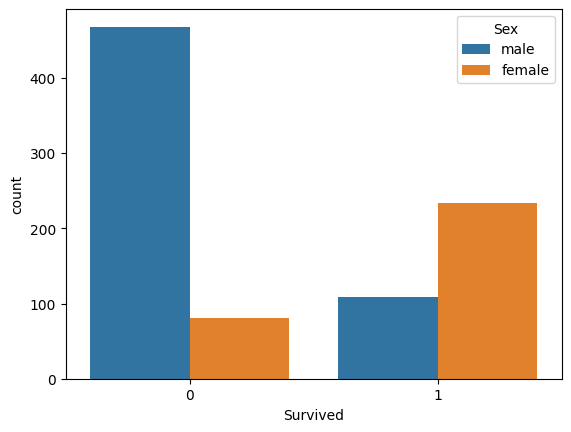

In [412]:
sns.countplot(data=df, x='Survived', hue='Sex')

<Axes: >

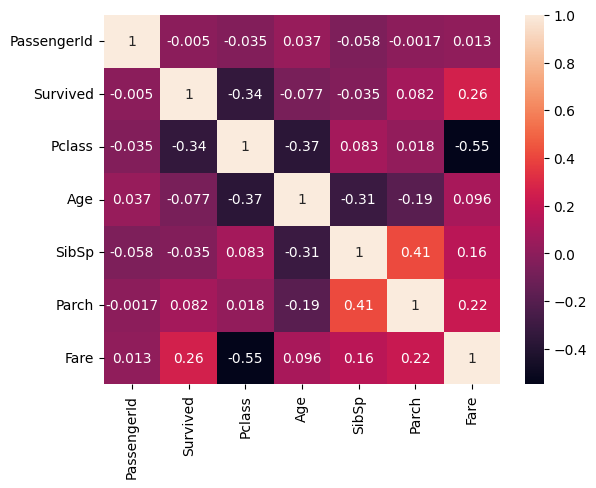

In [413]:
corr_matrix = df.corr(numeric_only=True)    # 상관관계 조사
corr_matrix

sns.heatmap(corr_matrix, annot=True)    # 상관관계 히트맵으로 보기

### 5~7. 데이터 전처리

5. 데이터 정제 및 전처리
6. 데이터 변환 및 피처 엔지니어링
7. 데이터 분할


In [414]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

np.int64(0)

In [415]:
df = df.drop('Cabin',axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [416]:
df['Family'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp','Parch'],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,0


<Axes: >

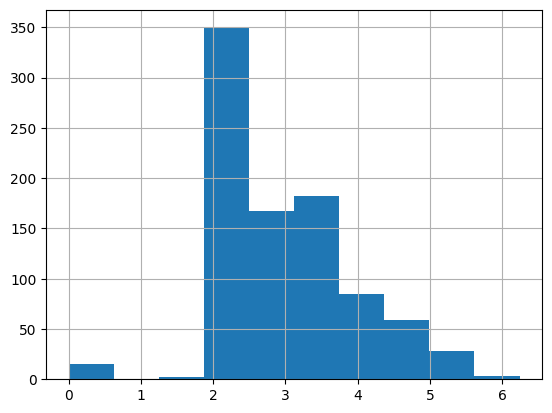

In [417]:
# df['Fare'].hist()

df['LogFare'] = df['Fare'].apply(lambda x:np.log1p(x))  #log(x+1) 밑이 10인 상용로그
df['LogFare'].hist()

In [418]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

In [419]:
from sklearn.model_selection import train_test_split

X_data = df.drop('Survived',axis=1)     # 정답을 빼는 것
Y_data = df['Survived']


X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data)

In [420]:
X_train, Y_train

(     PassengerId  Pclass                              Name  Sex        Age  \
 778          779       3           Kilgannon, Mr. Thomas J    1  29.699118   
 50            51       3        Panula, Master. Juha Niilo    1   7.000000   
 664          665       3       Lindqvist, Mr. Eino William    1  20.000000   
 267          268       3          Persson, Mr. Ernst Ulrik    1  25.000000   
 44            45       3     Devaney, Miss. Margaret Delia    0  19.000000   
 ..           ...     ...                               ...  ...        ...   
 573          574       3                 Kelly, Miss. Mary    0  29.699118   
 502          503       3    O'Sullivan, Miss. Bridget Mary    0  29.699118   
 625          626       1             Sutton, Mr. Frederick    1  61.000000   
 764          765       3            Eklund, Mr. Hans Linus    1  16.000000   
 15            16       2  Hewlett, Mrs. (Mary D Kingcome)     0  55.000000   
 
                 Ticket     Fare Embarked  Family 

### [한번 해보기] 타이타닉 생존률 예측에 필요한 전처리 해보기

##### 1. 데이터 로드
##### 2. 전처리 (-> 전처리 함수)
##### 3. 데이터 분리
##### 4. 특성 스케일링
##### 5. LogisticRegression 모델 학습
##### 6. 평가

In [421]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,A/5 21171,7.2500,S,1,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,PC 17599,71.2833,C,1,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,STON/O2. 3101282,7.9250,S,0,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,113803,53.1000,S,1,3.990834
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,373450,8.0500,S,0,2.202765
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,211536,13.0000,S,0,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,112053,30.0000,S,0,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,W./C. 6607,23.4500,S,3,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,111369,30.0000,C,0,3.433987


<Axes: >

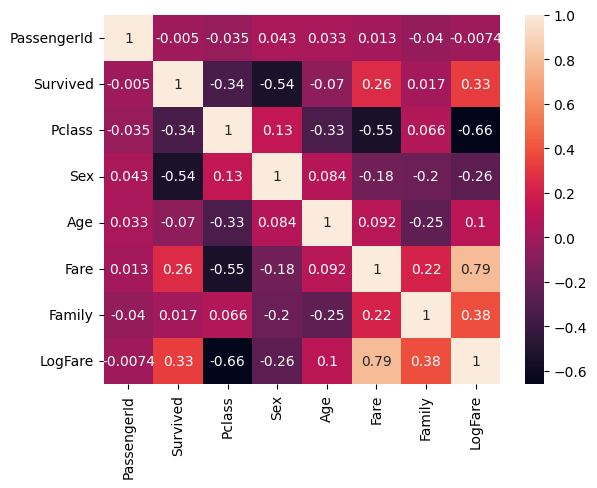

In [422]:
a = df.corr(numeric_only=True)

sns.heatmap(a,annot=True)

In [436]:
df = pd.read_csv('./data/titanic.csv')

def fillna(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    return df

def drop_feature(df):
    df = df.drop(['PassengerId', 'Name', 'Ticket'],axis=1)
    return df

def encode_feature(df):
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Embarked'] = le.fit_transform(df['Embarked'])
    df['Cabin'] = le.fit_transform(df['Cabin'].str[:1])
    return df

def preprocess(df):
    df = drop_feature(df)
    df = fillna(df)
    df = encode_feature(df)
    return df

def scailing_feature(train_data, test_data):

    from sklearn.preprocessing import StandardScaler

    standard_sc = StandardScaler()
    train_scaled = standard_sc.fit_transform(train_data)
    test_scaled = standard_sc.transform(test_data)

    return train_scaled, test_scaled


df = preprocess(df)

from sklearn.model_selection import train_test_split
X_data = df.drop('Survived',axis=1)
Y_data = df['Survived']
train_data, test_data, train_label, test_label = train_test_split(X_data, Y_data,random_state=42)


train_scaled, test_scaled = scailing_feature(train_data,test_data)


from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(train_scaled,train_label)

lr_clf.score(test_scaled,test_label)


0.8116591928251121

In [438]:
lr_clf.score(train_scaled,train_label)

0.7964071856287425